### Import the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

Load the data set telecom_churn

In [2]:
df = pd.read_csv("telecom_churn.csv")

Look at data dimensionality, feature names, and feature types.

In [3]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


##### Data DImensionality

In [4]:
df.ndim

2

##### Data Features

In [5]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

##### Data Feature Types

In [6]:
df.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

Write how many rows and columns you identified

Now print the column names

###### Number of Rows and Columns

In [7]:
#Number of Rows
df.shape[0]

3333

In [8]:
#Number of Columns
df.shape[1]

20

In [9]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

- From the Column Names, it is evident that this data from Telecom Company of users and details of several calls made by them

check the info of the dataframe

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

- There NO NULL values, thus no need  of Dropping and Filling NULLs

 **change the column type** with the `astype` method, and apply this method to the `Churn` feature to convert it into `int64`:

In [11]:
df['Churn'] = df['Churn'].astype('int64')

In [12]:
df.Churn.dtype

dtype('int64')

Describe the numerical feature

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Account length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
Area code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
Number vmail messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
Total day minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
Total day calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
Total day charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
Total eve minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
Total eve calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
Total eve charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
Total night minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


Describe categorical feature

In [14]:
df.describe(include = object).T

,count,unique,top,freq
State,3333,51,WV,106
International plan,3333,2,No,3010
Voice mail plan,3333,2,No,2411


From the Statistics of Numeric and Categorical Columns, it is evident that:
- Very less customers have Voice Mail Plan and thus very less of them use Voice Mail Messages.
- Mean Call Minutes in Evening and Night are higher than in the Day-time Minutes. This may be because all Customers might get leisure time after the working hours i.e. in Evening or in Night
- Very few customers (about 300) had opted for International Plan 
- Although, Mean Call Minutes are higher in night, and evening but call rates are lower for these time in comparision to Daytime
- Maximum Customer Service Call went upto 9 for someone
- Customers not having International Plan, still used to make International

Let's have a look at the distribution of `Churn`:

In [15]:
df.groupby('Churn')['Churn'].count()

Churn
0    2850
1     483
Name: Churn, dtype: int64

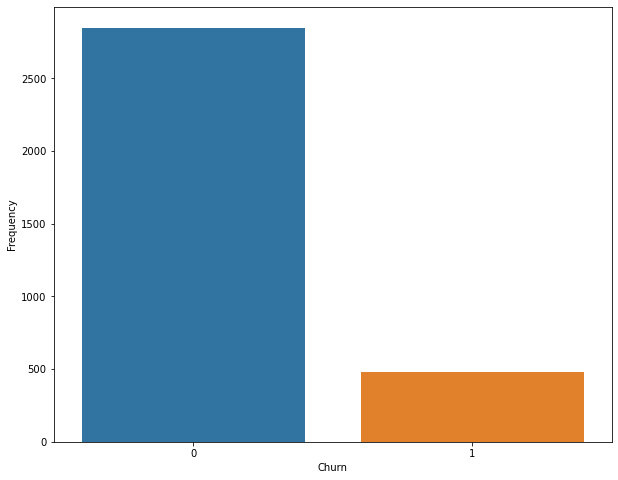

In [16]:
plt.figure(figsize = (10,8))
sns.countplot(x = 'Churn', data = df)

plt.xlabel("Churn")
plt.ylabel("Frequency")
plt.show()

- Clearly, 2850 (~85%) Customers have not left the services of this company, thus Company might be givigng good satisfactory call rates, offers on plans.

Identify how many loyal customers we have and it's percentage

##### Number of Total Customers

In [17]:
total = df['Churn'].count()
total

3333

##### Number of Loyal Customers

In [18]:
loyal = df[df['Churn'] == 0]['Churn'].count()
loyal

2850

- Number of Loyal Customers are those having Churn = 0 (or those who did not left the services)

##### Percentage of Loyal Customers

In [19]:
round((loyal/total)*100,2)

85.51

- It's a Good Sign for company that retention rate is good.


### Sorting

Sort by *Total day charge* (use `ascending=False` to sort in descending order):


In [20]:
df.sort_values('Total day charge', ascending = False)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
365,CO,154,415,No,No,0,350.8,75,59.64,216.5,94,18.40,253.9,100,11.43,10.1,9,2.73,1,1
985,NY,64,415,Yes,No,0,346.8,55,58.96,249.5,79,21.21,275.4,102,12.39,13.3,9,3.59,1,1
2594,OH,115,510,Yes,No,0,345.3,81,58.70,203.4,106,17.29,217.5,107,9.79,11.8,8,3.19,1,1
156,OH,83,415,No,No,0,337.4,120,57.36,227.4,116,19.33,153.9,114,6.93,15.8,7,4.27,0,1
605,MO,112,415,No,No,0,335.5,77,57.04,212.5,109,18.06,265.0,132,11.93,12.7,8,3.43,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986,WI,70,415,No,No,0,7.9,100,1.34,136.4,83,11.59,156.6,89,7.05,12.1,1,3.27,0,0
2753,OH,134,415,No,No,0,7.8,86,1.33,171.4,100,14.57,186.5,80,8.39,12.9,2,3.48,2,0
2736,OK,127,510,No,Yes,27,2.6,113,0.44,254.0,102,21.59,242.7,156,10.92,9.2,5,2.48,3,0
1397,VT,101,510,No,No,0,0.0,0,0.00,192.1,119,16.33,168.8,95,7.60,7.2,4,1.94,1,0


- Highest Total Length of call in Daytime was placed for about 351 minutes

sort by multiple columns:'Churn', 'Total day charge'

In [21]:
df.sort_values(['Churn', 'Total day charge'], ascending = False)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
365,CO,154,415,No,No,0,350.8,75,59.64,216.5,94,18.40,253.9,100,11.43,10.1,9,2.73,1,1
985,NY,64,415,Yes,No,0,346.8,55,58.96,249.5,79,21.21,275.4,102,12.39,13.3,9,3.59,1,1
2594,OH,115,510,Yes,No,0,345.3,81,58.70,203.4,106,17.29,217.5,107,9.79,11.8,8,3.19,1,1
156,OH,83,415,No,No,0,337.4,120,57.36,227.4,116,19.33,153.9,114,6.93,15.8,7,4.27,0,1
605,MO,112,415,No,No,0,335.5,77,57.04,212.5,109,18.06,265.0,132,11.93,12.7,8,3.43,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1052,OR,98,415,Yes,No,0,12.5,67,2.13,256.6,90,21.81,169.4,88,7.62,7.7,9,2.08,1,0
1986,WI,70,415,No,No,0,7.9,100,1.34,136.4,83,11.59,156.6,89,7.05,12.1,1,3.27,0,0
2753,OH,134,415,No,No,0,7.8,86,1.33,171.4,100,14.57,186.5,80,8.39,12.9,2,3.48,2,0
2736,OK,127,510,No,Yes,27,2.6,113,0.44,254.0,102,21.59,242.7,156,10.92,9.2,5,2.48,3,0


- Point to noitce is, People who used to make huge length of calls, have left the services. This maybe because they have work which requires a lot of calls to do and based on this data, it had costed them about 5.88 Rs. / minute in Day-time.
- They may have moved to more cheaper company which give attractive prices for calls especially in Day-time

### Indexing and retrieving data
**what is the proportion of churned users in our dataframe?**

##### Total Custoemrs

In [22]:
total

3333

##### Churned Customers

In [23]:
churned = df[df['Churn'] == 1]['Churn'].count()
churned

483

- About 14% have left the Services.

##### Proportion of Churned Customers

In [24]:
round(churned / total,2)

0.14


**What are average values of numerical features for churned users?**

In [25]:
df[df['Churn'] == 1].mean()

Account length            102.664596
Area code                 437.817805
Number vmail messages       5.115942
Total day minutes         206.914079
Total day calls           101.335404
Total day charge           35.175921
Total eve minutes         212.410145
Total eve calls           100.561077
Total eve charge           18.054969
Total night minutes       205.231677
Total night calls         100.399586
Total night charge          9.235528
Total intl minutes         10.700000
Total intl calls            4.163561
Total intl charge           2.889545
Customer service calls      2.229814
Churn                       1.000000
dtype: float64

- The mean Value for Day Minutes, Evening Minutes and Night Minutes are higher for Churned Customers in comparision to original dataset mean values
- This means that people who have been loyal has tend to use services less than those who churned out
- Thus Company has lost its cream Customers who had majorly used their services

**How much time (on average) do churned users spend on the phone during daytime?**

In [26]:
round(df[df['Churn'] == 1]['Total day minutes'].mean(),2)

206.91


**What is the maximum length of international calls among loyal users (`Churn == 0`) who do not have an international plan?**



##### Customers with International Plan

In [27]:
cust_intl = df[df['International plan'] == 'No']

In [28]:
cust_intl[cust_intl['Churn'] == 0]['Total intl minutes'].max()

18.9

select and display 5 rows for State and Area code

In [29]:
df[['State', 'Area code']].head()

,State,Area code
0,KS,415
1,OH,415
2,NJ,415
3,OH,408
4,OK,415


Display lastline in the daframe

In [30]:
df.tail(1)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.6,241.4,77,10.86,13.7,4,3.7,0,0



### Applying Functions to Cells, Columns and Rows

**To apply functions to each column, use `apply()`:**

Use apply to find the max value for each feature


In [31]:
df.apply(lambda x : x.max())

State                        WY
Account length              243
Area code                   510
International plan          Yes
Voice mail plan             Yes
Number vmail messages        51
Total day minutes         350.8
Total day calls             165
Total day charge          59.64
Total eve minutes         363.7
Total eve calls             170
Total eve charge          30.91
Total night minutes         395
Total night calls           175
Total night charge        17.77
Total intl minutes           20
Total intl calls             20
Total intl charge           5.4
Customer service calls        9
Churn                         1
dtype: object

Get all the states whose name starts with "W"

In [32]:
df[df['State'].str.contains(r'^W')]['State'].unique()

array(['WV', 'WY', 'WI', 'WA'], dtype=object)

For international plan feature replace No with False and Yes with True

In [33]:
df['International plan'] = df['International plan'].apply(lambda x : 'True' if x == 'Yes' else 'False')

In [34]:
df['International plan'].head()

0    False
1    False
2    False
3     True
4     True
Name: International plan, dtype: object

The same thing can be done with the `replace` method:

In [35]:
df['International plan'] = df['International plan'].replace({'Yes': 'True', 'No':'False'})

In [36]:
df['International plan'].head()

0    False
1    False
2    False
3     True
4     True
Name: International plan, dtype: object


### Grouping


Group by churn and get the stats for 'Total day minutes', 'Total eve minutes', 'Total night minutes'

In [37]:
df.groupby('Churn')[['Total day minutes', 'Total eve minutes', 'Total night minutes']].mean()

,Total day minutes,Total eve minutes,Total night minutes
Churn,,,
0,175.175754,199.043298,200.133193
1,206.914079,212.410145,205.231677


- Mean Total Day, Evening and Night Minutes are higher for those who left the services, as discussed above that company had lost its cream customers.

Do using `agg()`:

In [38]:
df.groupby('Churn')[['Total day minutes', 'Total eve minutes', 'Total night minutes']].agg('mean')


### Summary tables
Build a **contingency table** using the `crosstab` method: For 'International plan' and Churn



In [39]:
pd.crosstab(df['International plan'], df['Churn'])

Churn,0,1
International plan,,
False,2664,346
True,186,137


- Large number of customers not having International Plans did not left the services
- Many who didn't had the International Plans left the services, maybe because they used to make a lot of international calls and it would cost them higher and International Plan would also have costed hgigher.

In [40]:
#for voice mail plan

In [41]:
pd.crosstab(df['Voice mail plan'], df['Churn'])

Churn,0,1
Voice mail plan,,
No,2008,403
Yes,842,80


- Very few people having Voice Mail Plan left the services, thus Voice Mail Plan would not be the reason for the Churn

##### check the average number of day, evening, and night calls by area code:

In [42]:
df.groupby('Area code')[['Total day minutes', 'Total eve minutes', 'Total night minutes']].mean()

,Total day minutes,Total eve minutes,Total night minutes
Area code,,,
408,177.175418,201.284248,199.214678
415,181.592628,200.652085,202.037583
510,178.787619,201.323929,200.229048


- Area Code 415 has higher mean Day, Evening and Night Call Minutes which may be because Customer base in Area 415 is higher than the other two. (See Below)

In [43]:
df.groupby('Area code')['Area code'].count()

Area code
408     838
415    1655
510     840
Name: Area code, dtype: int64


### Feature Adding

calculate the total number of calls for all users, and create the `total_calls` Series and paste it into the DataFrame:



In [44]:
df['total_calls'] = df['Total day calls'] + df['Total eve calls'] + df['Total night calls'] + df['Total intl calls'] + df['Customer service calls']

In [45]:
df['total_calls']

0       304
1       333
2       333
3       257
4       362
       ... 
3328    294
3329    242
3330    266
3331    338
3332    276
Name: total_calls, Length: 3333, dtype: int64

## 2. Visualization


In [46]:
# imports for plotting 
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
#count plot between International plan and churn, what is your observation

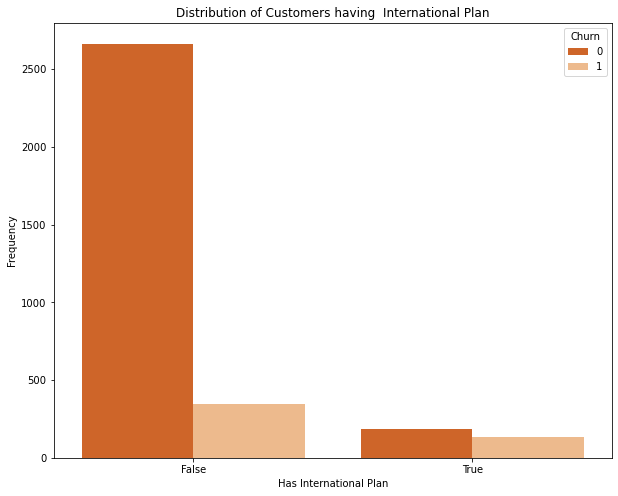

In [48]:
plt.figure(figsize = (10,8))
sns.countplot(x = 'International plan', data = df, hue = 'Churn', palette = 'Oranges_r')

plt.xlabel("Has International Plan")
plt.ylabel("Frequency")
plt.title("Distribution of Customers having  International Plan")
plt.show()

- Those having International Plan, most of them have left the services. Thus International Call Plan is one of the highly responsible cntraint for churn

Next, look at another important feature – *Customer service calls*. make a summary table and a picture.

In [49]:
df.groupby('Customer service calls')['Customer service calls'].count()

Customer service calls
0     697
1    1181
2     759
3     429
4     166
5      66
6      22
7       9
8       2
9       2
Name: Customer service calls, dtype: int64

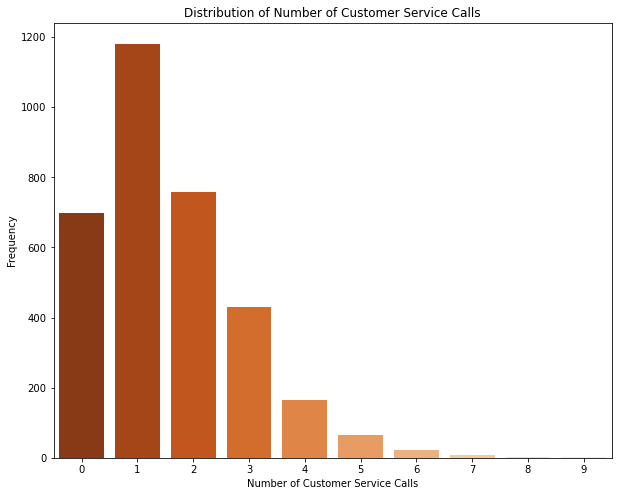

In [50]:
plt.figure(figsize = (10,8))
sns.countplot(x = 'Customer service calls', data = df, palette = 'Oranges_r')

plt.xlabel('Number of Customer Service Calls')
plt.ylabel('Frequency')
plt.title("Distribution of Number of Customer Service Calls")

plt.show()

- Most of the cutomers have placed atleast 1 Customer Service Call

In [51]:
df.groupby(['Churn', 'Customer service calls'])['Customer service calls'].count()

Churn  Customer service calls
0      0                          605
       1                         1059
       2                          672
       3                          385
       4                           90
       5                           26
       6                            8
       7                            4
       8                            1
1      0                           92
       1                          122
       2                           87
       3                           44
       4                           76
       5                           40
       6                           14
       7                            5
       8                            1
       9                            2
Name: Customer service calls, dtype: int64

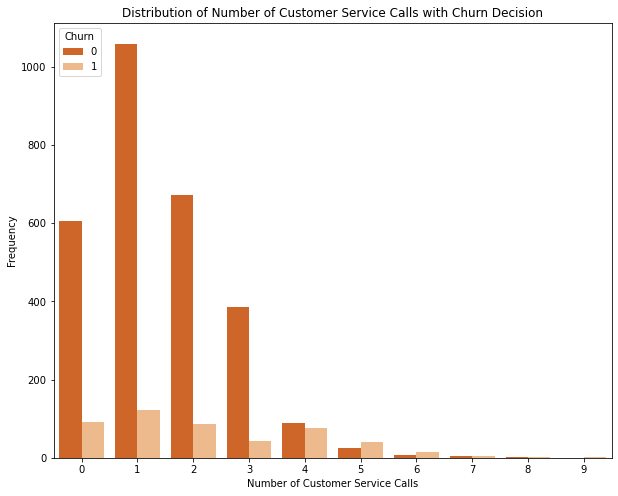

In [52]:
plt.figure(figsize = (10,8))
sns.countplot(x = 'Customer service calls', data = df, hue = 'Churn', palette = 'Oranges_r')

plt.xlabel("Number of Customer Service Calls")
plt.ylabel('Frequency')
plt.title("Distribution of Number of Customer Service Calls with Churn Decision")

plt.show()

- Most of the Cusot
- Customers placing 5 or more Customer Service Calls tend to end the services more
- 2 Custoemrs have placed 9 Customer Service Calls before exiting the services


Now add a binary feature to the DataFrame – `Customer service calls > 3`. And name it 'Many service calls' after that see how it relates to churn. 

In [53]:
df['many service calls'] = df['Customer service calls']

In [54]:
df['many service calls'] = df['many service calls'].apply(lambda x: 'True' if x > 3 else 'False')

In [55]:
df[df['many service calls'] == 'True']

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,total_calls,many service calls
10,IN,65,415,False,No,0,129.1,137,21.95,228.5,...,208.8,111,9.40,12.7,6,3.43,4,1,341,True
14,IA,62,415,False,No,0,120.7,70,20.52,307.2,...,203.0,99,9.14,13.1,6,3.54,4,0,255,True
15,NY,161,415,False,No,0,332.9,67,56.59,317.8,...,160.6,128,7.23,5.4,9,1.46,4,1,305,True
21,CO,77,408,False,No,0,62.4,89,10.61,169.9,...,209.6,64,9.43,5.7,6,1.54,5,1,285,True
48,ID,119,415,False,No,0,159.1,114,27.05,231.3,...,143.2,91,6.44,8.8,3,2.38,5,1,330,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,OK,172,408,False,No,0,203.9,109,34.66,234.0,...,160.7,65,7.23,17.8,4,4.81,4,0,305,True
3309,VT,100,408,True,No,0,219.4,112,37.30,225.7,...,255.3,95,11.49,12.0,4,3.24,4,0,317,True
3320,GA,122,510,True,No,0,140.0,101,23.80,196.4,...,120.1,133,5.40,9.7,4,2.62,4,1,319,True
3322,MD,62,408,False,No,0,321.1,105,54.59,265.5,...,180.5,72,8.12,11.5,2,3.11,4,1,305,True


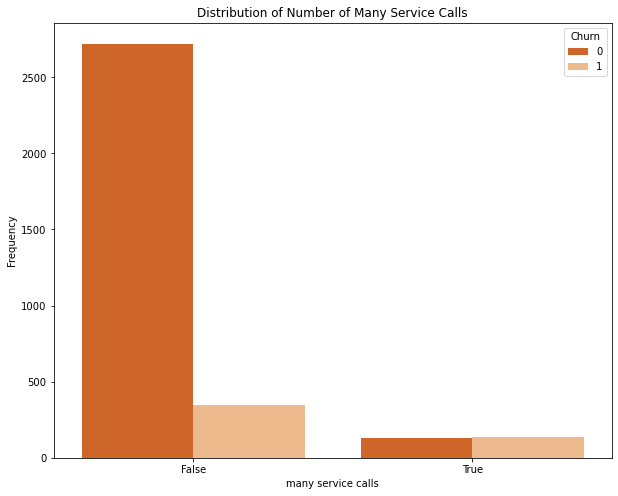

In [56]:
plt.figure(figsize = (10,8))
sns.countplot(x = 'many service calls', data = df, hue = 'Churn', palette = 'Oranges_r')

plt.ylabel('Done Many Service Calls?')
plt.ylabel('Frequency')
plt.title("Distribution of Number of Many Service Calls")

plt.show()

- Many of Custoemrs who had placed more than 3 Customer Service calls (or many serive calls), have left the services
- Bar of True class has shown equal almost number of Churn Rate because the relative class of many service calls is much higher, thus it seems very similiar. (See below the exact number of customers)

In [57]:
df.groupby(['Churn', 'many service calls'])['many service calls'].count()

Churn  many service calls
0      False                 2721
       True                   129
1      False                  345
       True                   138
Name: many service calls, dtype: int64

##### Construct another contingency table that relates *Churn* with both *International plan* and freshly created *Many_service_calls*.

In [58]:
pd.crosstab(df['International plan'], df['Churn'])

Churn,0,1
International plan,,
False,2664,346
True,186,137


In [59]:
pd.crosstab(df['many service calls'], df['Churn'])

Churn,0,1
many service calls,,
False,2721,345
True,129,138


##### Give overall inference and which variable can used as best predictor for churn.

- International Plan Charges seems to affect the Churn Rate as seen above, thus Company should work upon its Internation Plan
- Customers placing high number of calls throughtout the day, evening and night have churned out thus, Company can work ipon plan prices or offers. 
- It had costed about 5.88 Rs. / minute in Day-time to Custoemrs, thus it would be a big hole to packets of customer splacing more calls.
- Customers had to place many Customer Service Calls, thus Company should work upon Customer Service and Satisfaction by training of necessary staff.
- Churn Rate was very lessly affected by the Voice Mail Plan thus, Company can use it as a tool to bring more customers to use Voice Mail Plan

#### Extra Exploratory Data Analysis

##### Churn Rate by Area Code

In [60]:
df.groupby(["Area code", 'Churn'])['Churn'].count()

Area code  Churn
408        0         716
           1         122
415        0        1419
           1         236
510        0         715
           1         125
Name: Churn, dtype: int64

In [61]:
df['Area code'] = df['Area code'].astype('object')

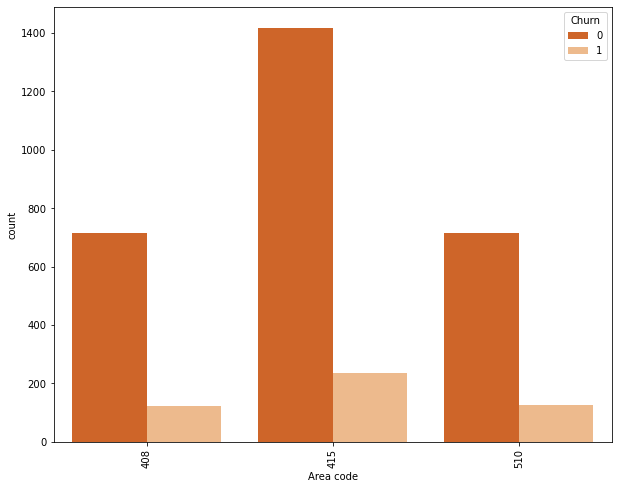

In [62]:
plt.figure(figsize = (10,8))
sns.countplot('Area code', data = df, hue = 'Churn', palette = 'Oranges_r')
plt.xticks(rotation = 90)

plt.show()

- Area Code 415 shows higher Churn Rate than other two, thus COmpany can work specifically on the same
- Company can work upon building more customer base in remaining two Areas

In [63]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn', 'total_calls', 'many service calls'],
      dtype='object')

#####  Affect of High Account Length (Old Customers)

In [64]:
df_acct = df[df['Account length'] > 200]

In [65]:
df_acct.groupby('Churn')['Account length'].count()

Churn
0    20
1     6
Name: Account length, dtype: int64

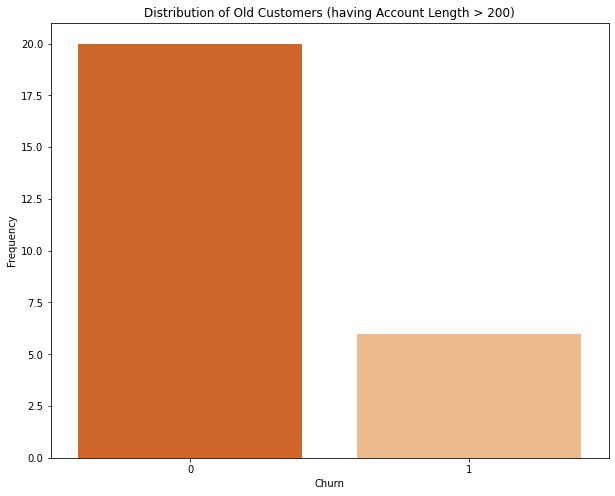

In [66]:
plt.figure(figsize = (10,8))
sns.countplot('Churn', data = df_acct, palette = 'Oranges_r')

plt.ylabel('Frequency')
plt.title("Distribution of Old Customers (having Account Length > 200)")
plt.show()

- About 30% of Total Old Customers (having Account Length > 200) have left the services